In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True) #, force_remount=True
import os
path = "/content" # /content is pretty much the root. you can choose other path in your colab workspace
os.chdir(path)
%cd /content/drive/My Drive/Colab Notebooks/Thesis/Add_Channel/

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/Thesis/Add_Channel


In [ ]:
from PIL import Image
from numpy import asarray
image = Image.open('0_disp.png')
numpydata = asarray(image)
# <class 'numpy.ndarray'>
print(type(numpydata))
#  shape
print(numpydata.shape)

<class 'numpy.ndarray'>
(683, 1029, 3)


In [ ]:
image = Image.open('059.png')
numpydata = asarray(image)
# <class 'numpy.ndarray'>
print(type(numpydata))
#  shape
print(numpydata.shape)

<class 'numpy.ndarray'>
(683, 1029, 3)


In [ ]:
# card = Image.new("RGBA", (220, 220), (255, 255, 255))
# img = Image.open("0_disp.png").convert("RGBA")
# x, y = img.size
# card.paste(img, (0, 0, x, y), img)
# card.save("test1.png", format="png")

In [ ]:
# card = Image.new("RGBA", (220, 220), (255, 255, 255))
# img = Image.open("059.png").convert("RGBA")
# x, y = img.size
# card.paste(img, (0, 0, x, y), img)
# card.save("test2.png", format="png")

In [ ]:
# background = Image.open("test1.png")
# foreground = Image.open("test2.png")

# background.paste(foreground, (0, 0), foreground)
# background.show()

In [ ]:
# background.show()

In [ ]:
# Image.alpha_composite(background, foreground).save("test3.png")

In [ ]:
# layer1 = Image.open("test1.png")
# layer2 = Image.open("test2.png")

# final2 = Image.new("RGBA", layer1.size)
# final2 = Image.alpha_composite(final2, layer1)
# final2 = Image.alpha_composite(final2, layer2)
# final2.save("test4.png")

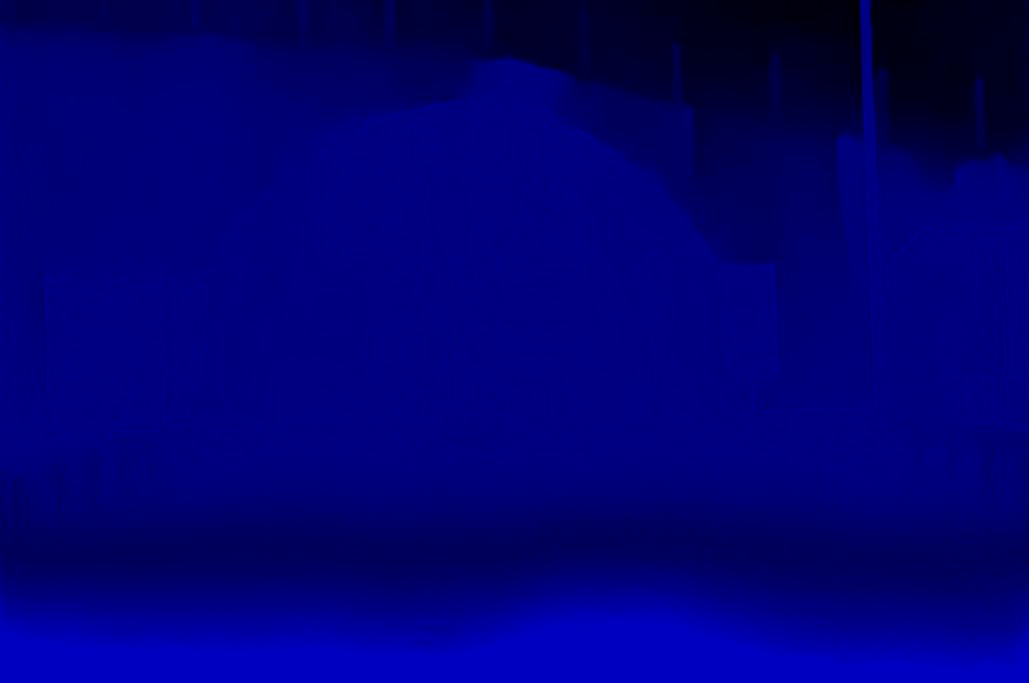

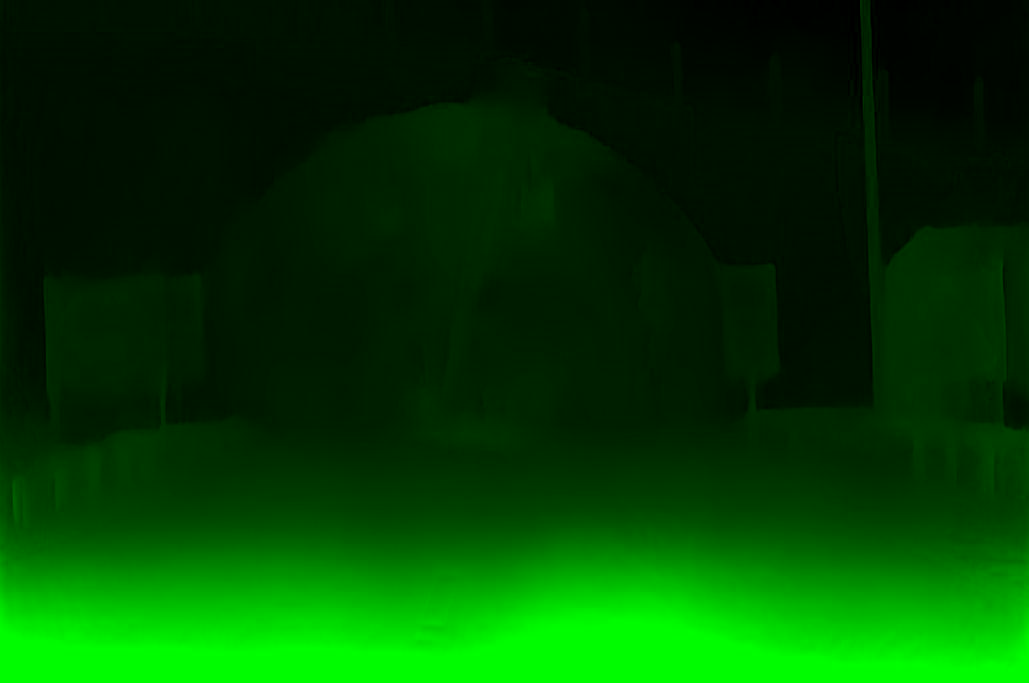

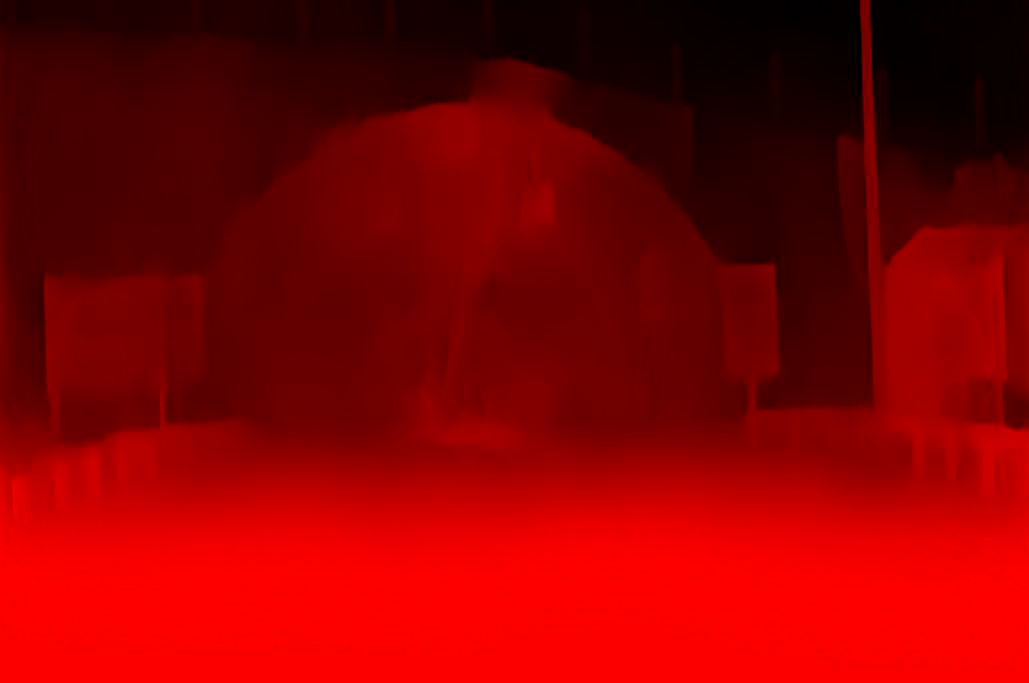

In [7]:
from google.colab.patches import cv2_imshow
import cv2

image = cv2.imread('0_disp.png')

b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0


# RGB - Blue
cv2_imshow(b)

# RGB - Green
cv2_imshow(g)

# RGB - Red
cv2_imshow(r)

# cv2_imshow(0)


In [ ]:
# print(b[2])

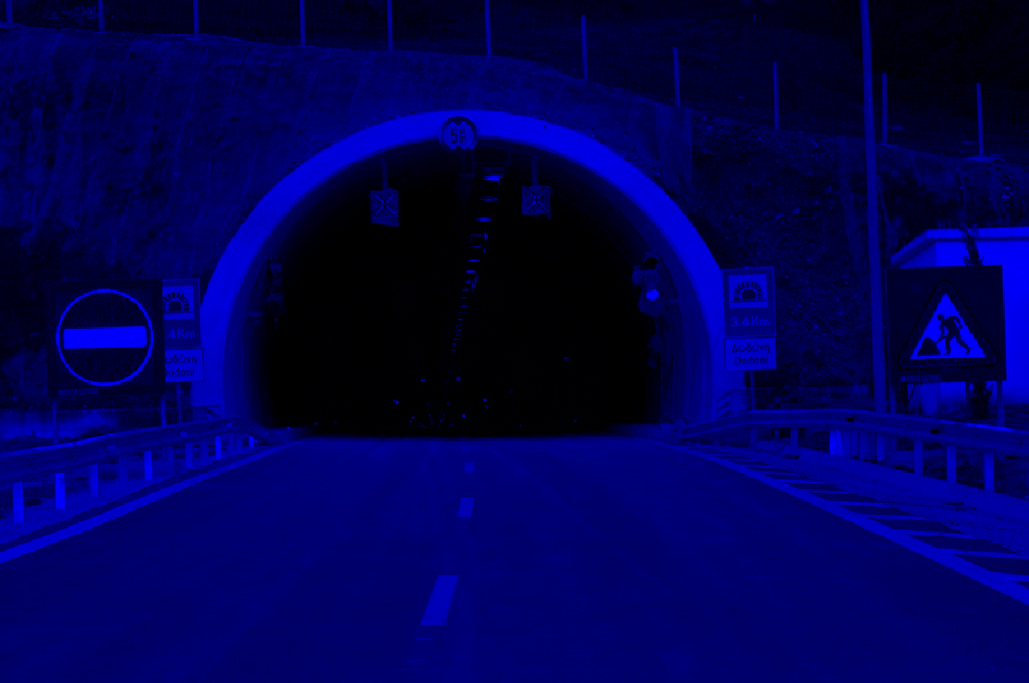

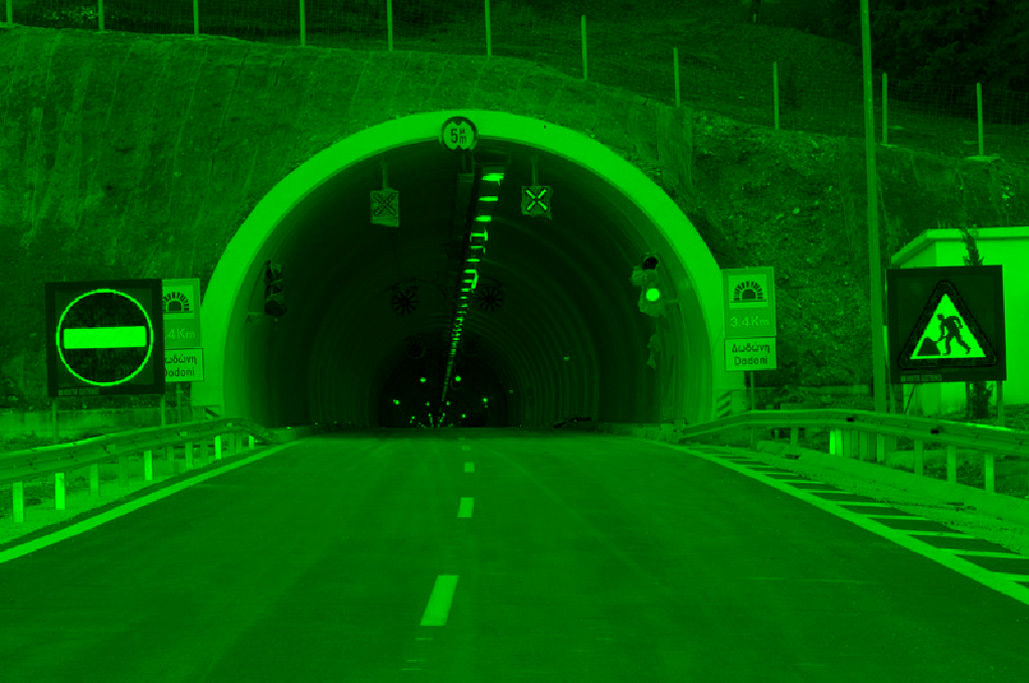

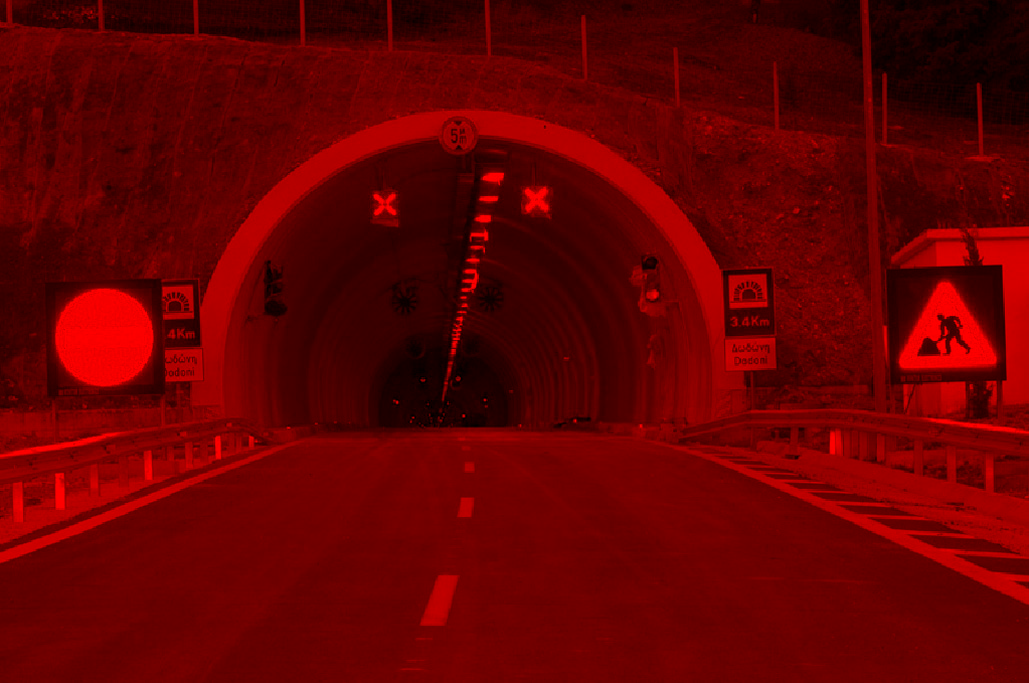

In [9]:
image2 = cv2.imread('059.png')

b2 = image2.copy()
# set green and red channels to 0
b2[:, :, 1] = 0
b2[:, :, 2] = 0


g2 = image2.copy()
# set blue and red channels to 0
g2[:, :, 0] = 0
g2[:, :, 2] = 0

r2 = image2.copy()
# set blue and green channels to 0
r2[:, :, 0] = 0
r2[:, :, 1] = 0


# RGB - Blue
cv2_imshow(b2)

# RGB - Green
cv2_imshow(g2)

# RGB - Red
cv2_imshow(r2)


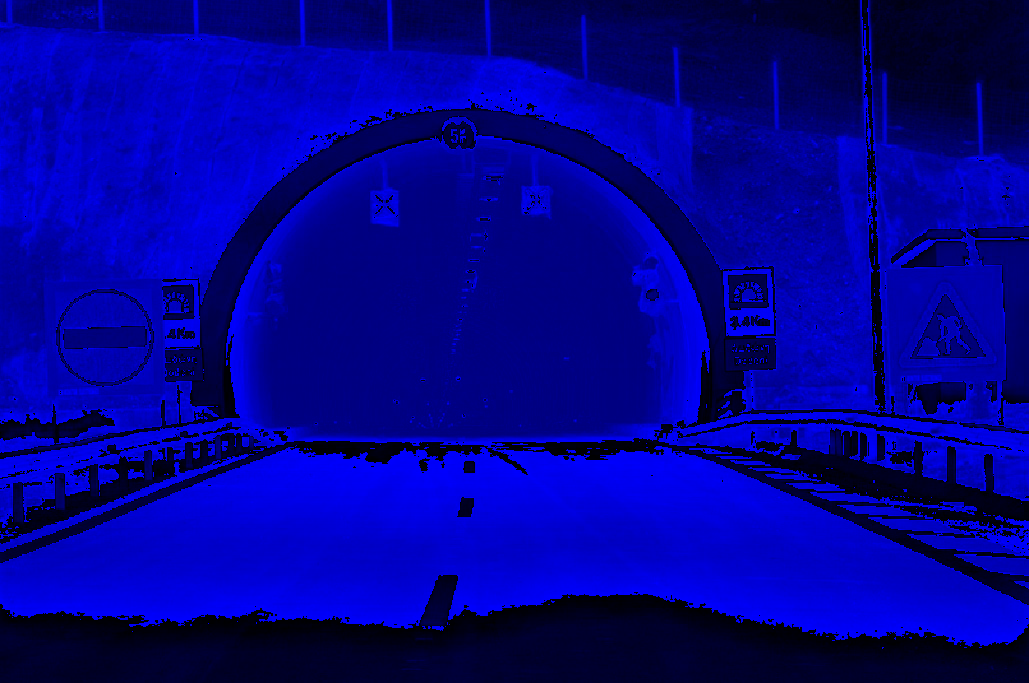

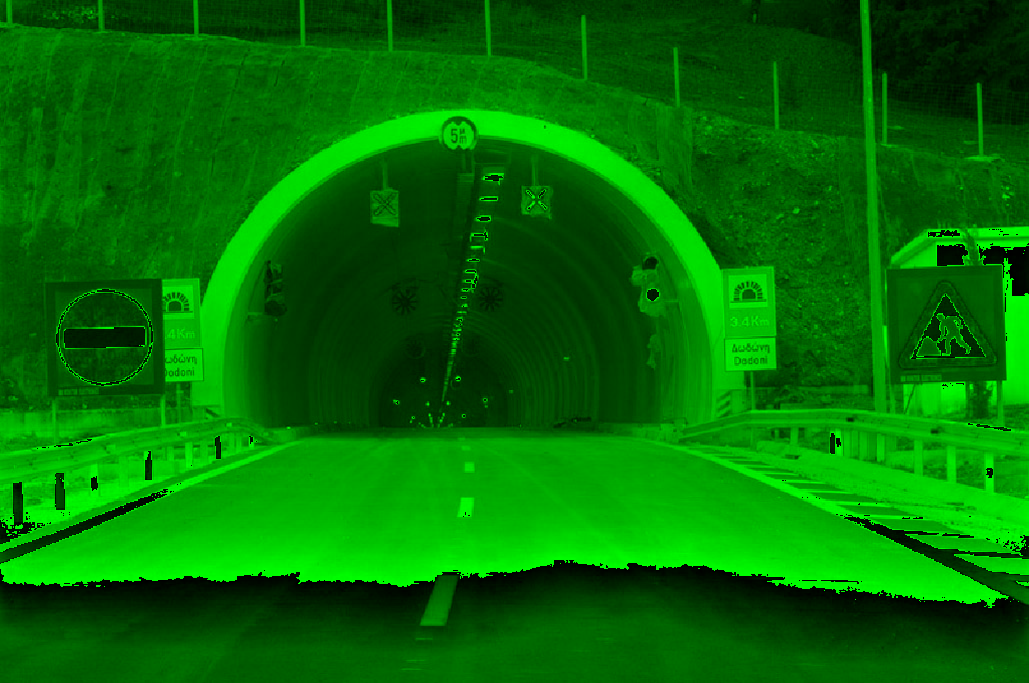

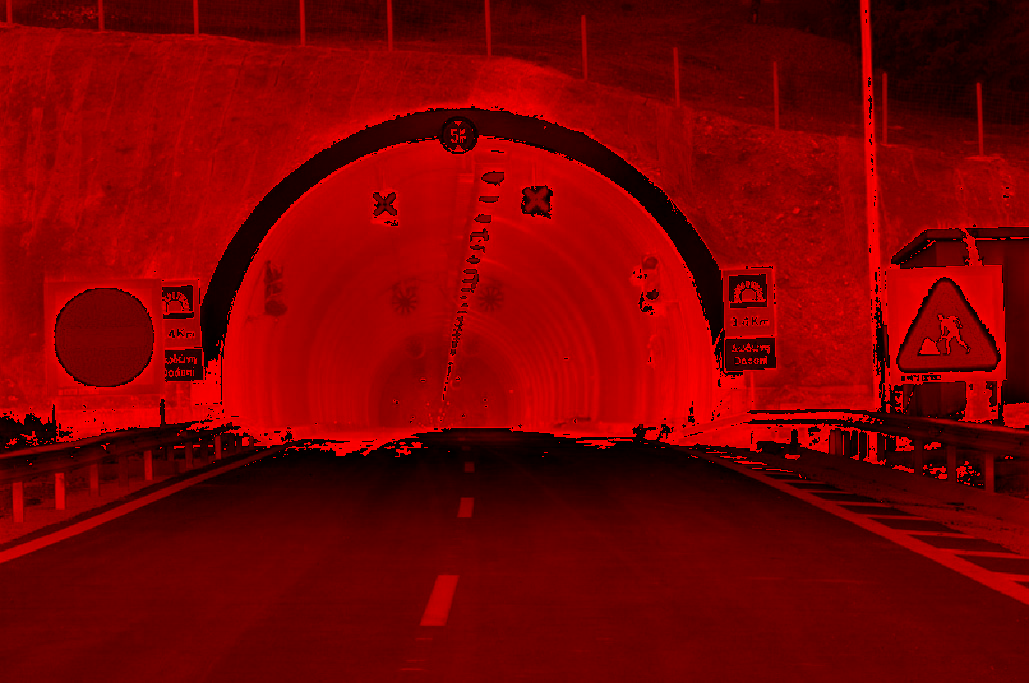

In [ ]:
b3 = b2 + b
g3 = g2 + g
r3 = r2 + r
cv2_imshow(b3)
cv2_imshow(g3)
cv2_imshow(r3)

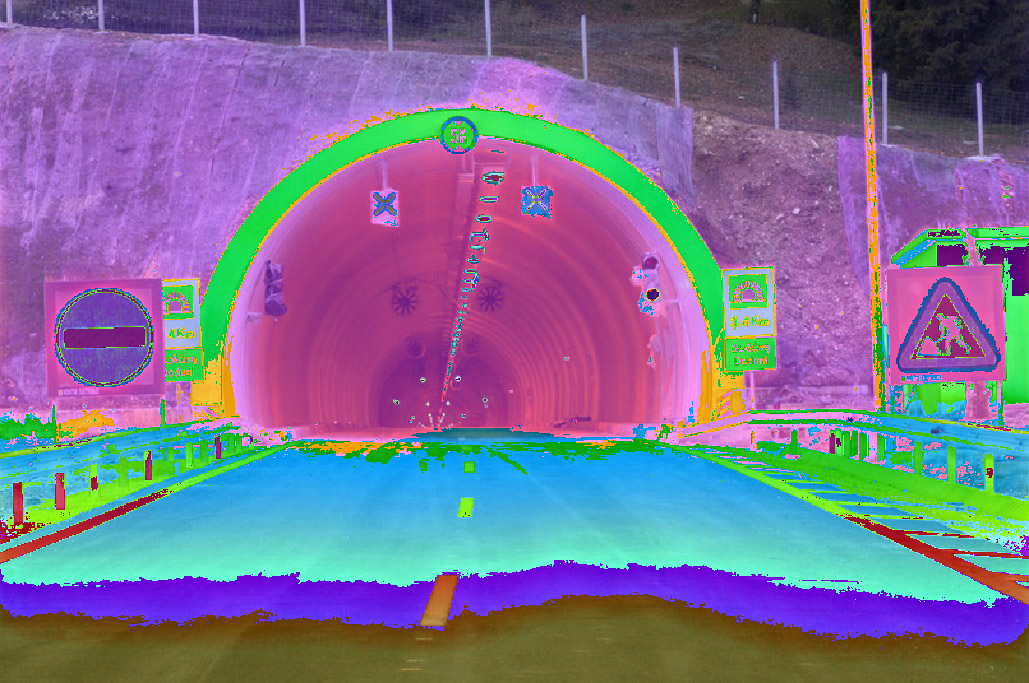

In [ ]:
merged = b3.copy()
merged[:,:,1] = g3[:,:,1]
merged[:,:,2] = r3[:,:,2]
cv2_imshow(merged)

## Merge the DiffNet output
Yu Sun

I don't have access to the original files, but this is what you can do.

In [ ]:
from skimage import io
import numpy as np

# Read the RGB source image and diff-net output
# Assuming they have the same resolution
src_img = io.imread("path/to/source.jpg")           # 3-channel
diff_out = io.imread("path/to/diff_net output.jpg")  # 1-channel

merged = np.concatenate([src_img, diff_out])

# Save the output
io.imsave('merged.png', merged)

Refer to the following dummy example.

In [36]:
import numpy as np

In [37]:
a = np.ones((2,2,3))
b = np.zeros((2,2,1))

print(a.shape)
print(b.shape)

(2, 2, 3)
(2, 2, 1)


In [38]:
merged = np.concatenate([a, b], -1)

In [39]:
merged.shape

(2, 2, 4)

In [40]:
merged

array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.]]])

In [68]:
from skimage import io
import numpy as np

# Read the RGB source image and diff-net output
# Assuming they have the same resolution
src_img = io.imread("0_disp.png")           # 3-channel
diff_out = io.imread("059.png")  # 1-channel
diff_out_b = diff_out[:, :, 0:1]
diff_out_g = diff_out[:, :, 1:2]
diff_out_r = diff_out[:, :, 2:3]

# print(diff_out.shape)
# # print(diff_out)
# #Can delete this
# from skimage import color
# # from skimage import io
# diff_out = io.imread('059.png', as_gray=True)
# diff_out = np.reshape(diff_out, (683, 1029,1))
# #This
# # print(diff_out)

# print(src_img.shape)
# print(diff_out.shape)

merged_b = np.concatenate([src_img, diff_out_b],-1)
merged_g = np.concatenate([src_img, diff_out_g],-1)
merged_r = np.concatenate([src_img, diff_out_r],-1)

# Save the output
io.imsave('merged_b.png', merged_b)
io.imsave('merged_g.png', merged_g)
io.imsave('merged_r.png', merged_r)

In [33]:
diff_out = io.imread("059.png").convert('LA')
# img = Image.open('image.png').convert('LA')
print(diff_out.shape)
diff_out = diff_out[:,:, 0:1]
print(diff_out[0].shape)

(683, 1029, 3)
(1029, 1)


In [51]:
print(type(diff_out))

<class 'numpy.ndarray'>


In [60]:
io.imsave('merged.png', merged)

<ipython-input-60-0bacb33ea1a1>:1: UserWarning: merged.png is a low contrast image
  io.imsave('merged.png', merged)


In [80]:
from skimage import color
# from skimage import io
diff_out = io.imread('059.png', as_gray=True)
diff_out = np.reshape(diff_out, (683, 1029,1))
diff_out = (diff_out*255).astype(np.uint8)
print(diff_out)
io.imsave('test_merge.png', diff_out)
# imsave('testing-sorted-hue.png', (color.convert_colorspace(in_hsv_h, 'HSV', 'RGB')*255).astype(np.uint8))

[[[ 77]
  [ 78]
  [ 76]
  ...
  [ 25]
  [ 26]
  [ 22]]

 [[ 73]
  [ 74]
  [ 75]
  ...
  [ 31]
  [ 31]
  [ 28]]

 [[ 74]
  [ 72]
  [ 77]
  ...
  [ 34]
  [ 33]
  [ 31]]

 ...

 [[102]
  [100]
  [ 98]
  ...
  [ 95]
  [ 94]
  [ 93]]

 [[102]
  [100]
  [ 98]
  ...
  [ 95]
  [ 94]
  [ 93]]

 [[103]
  [100]
  [ 98]
  ...
  [ 95]
  [ 94]
  [ 93]]]


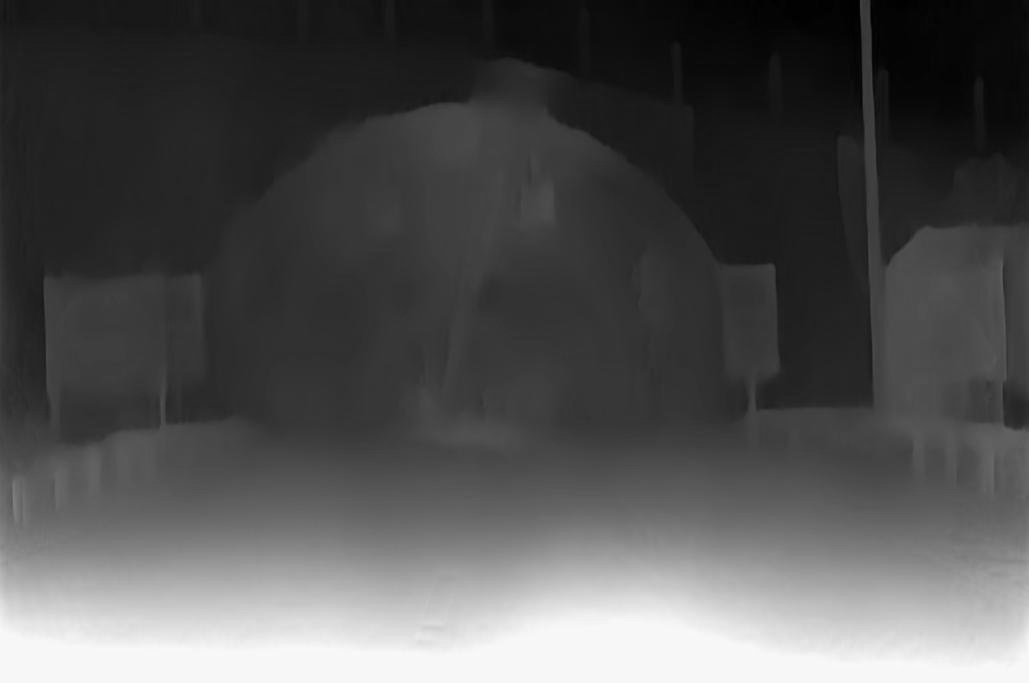

In [84]:
from skimage import io
import numpy as np

src_img = io.imread("059.png")          # 3-channel

diff_out = io.imread('0_disp.png', as_gray=True)
diff_out = np.reshape(diff_out, (683, 1029,1))
diff_out = (diff_out*255).astype(np.uint8)

merged_b = np.concatenate([src_img, diff_out_b],-1)

cv2_imshow(diff_out)
# io.imsave('merge_final.png', diff_out)